In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving subsidiKRL_Bersih.csv to subsidiKRL_Bersih.csv


In [ ]:
file = "subsidiKRL_Bersih.csv"
df = pd.read_csv(file)

# **Normalisasi**

---



---



In [ ]:
df['text'] = df['text'].str.lower()

In [ ]:
# Normalisasi
norm = {" tdk ": " tidak ", " tak ": " tidak ", " gak ": " tidak "," bkn ": " tidak ", " ga ": " tidak ", " g ": " tidak ",
        " enggak ": " tidak ", " engga ": " tidak ", " ngga ": " tidak ",  " belum ": " tidak ", " blm ": " tidak ",
        " mtr ": " motor ", " mbl ": " mobil ", " amp ": " ", " jln ": " jalan ", " beut ": " banget ", " jg ": " juga ",
        " nnti ": " nanti ", " bgt ": " banget ", " dicut ": " potong ", " jls ": " jelas ", " yg ": " yang ",
        " smua ": " semua ", " krn ": " karena ",  " lg ": " lagi ", " gak ": " tidak ", " kaga ": " tidak ",
        " dr ": " dari ", " jd ": " jadi ", " tpi ": " tapi ", " unt ": " untuk ", " utk ": " untuk ", " sy ": " saya ",
        "kl ": " kalo ", " kl ": " kalo ", " smoga ": " semoga ", " bhkan ": " bahkan ", " gak ": " tidak ",
        " tmbh ": " tambah ",  " lgi ": " lagi ", " gt ": " gitu ", " tp ": " tapi ", " case ": " masalah ", " masalh ": " masalah ",
        " sbgai ": " sebagai ", " klo ": " kalo ", " pgn ": " ingin ", " drpd ": " daripada ", " cmn ": " hanya ",
        " dgn ": " dengan ",  " jdi ": " jadi ", " gak ": " tidak ", " sbnrnya ": " sebenarnya ", " lbh ": " lebih ",
        " sdangkan ": " sedangkan ", " dpt ": " dapat ", " dapet ": " dapat ", " pke ": " pakai ", " pake ": " pakai ",
        " org ": " orang ",  " bwh ": " bawah ", " dlu ": " dulu ", " sdh ": " sudah ", " dg ": " dengan ", " jgn ": " jangan ",
        " hrs ": " harus ", " hrsnya ": " harus ", " pk ": " pakai ", " bnyk ": " banyak ", " bsa ": " bisa ",
        " udh ": " sudah ",  " jd ": " jadi ", " kls ": " kelas ", " klo ": " kalau ", " msyrkt ": " masyarakat "}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['text'] = df['text'].astype(str).apply(lambda x: normalisasi(x))
df

,date,likes,text,label
0,Mon Sep 30 12:24:19 +0000 2024,0,apa cuma gw yang ngerasa krl makin padet pradu...,netral
1,Mon Sep 30 11:31:00 +0000 2024,2,wacana penerapan subsidi tarif krl berdasarkan...,netral
2,Sun Sep 29 15:26:36 +0000 2024,0,subsidi krl dipersempit berdasarkan nik warga ...,negatif
3,Sun Sep 29 12:50:51 +0000 2024,0,saya yakin sih tidak akan seperti analisi pak ...,netral
4,Sun Sep 29 12:33:14 +0000 2024,25,kementerian bumn mau diubah jadi badan pengama...,netral
...,...,...,...,...
1049,Wed Aug 28 10:36:47 +0000 2024,16,karena apbn sudah berdarah darah maka ketemu l...,positif
1050,Wed Aug 28 10:30:22 +0000 2024,2,bbm gas krl busway segala sesuatu subsidi jika...,negatif
1051,Wed Aug 28 10:21:44 +0000 2024,0,pemerintah akan ubah skema subsidi krl jabodet...,netral
1052,Wed Aug 28 10:16:00 +0000 2024,2656,pemerintah akan ubah skema subsidi krl jabodet...,netral


# **Stopwords**

---



---



In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Stopwords
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stopword = ["gw", "apa", "sih", "ini", "kan", "sini", "sih", "akan", "di", "dan", "atau", "ato", "lalu", "juga",
                 "pula", "gue", "per", "dong", "nya", "merupakan", "lo", "lu", "gua", "nah", "aku", "kalo", "jadi",
                 "termasuk", "sama", "terus", "biar", "hal", "sedang", "lah", "pak", "cuma", "si", "aja", "lagi",
                 "kalau", "itu", "apaan", "siapa", "deh", "kok", "eh", "mah", "tuh", "loh", "kalian", "dari"]

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stopword)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['text'] = df['text'].apply(lambda x: stopword(x))
df

,date,likes,text,label
0,Mon Sep 30 12:24:19 +0000 2024,0,ngerasa krl makin padet praduga bersalah menga...,netral
1,Mon Sep 30 11:31:00 +0000 2024,2,wacana penerapan subsidi tarif krl berdasarkan...,netral
2,Sun Sep 29 15:26:36 +0000 2024,0,subsidi krl dipersempit berdasarkan nik warga ...,negatif
3,Sun Sep 29 12:50:51 +0000 2024,0,yakin analisi trubus subsidi krl sebelum kemen...,netral
4,Sun Sep 29 12:33:14 +0000 2024,25,kementerian bumn mau diubah badan pengamat seb...,netral
...,...,...,...,...
1049,Wed Aug 28 10:36:47 +0000 2024,16,apbn berdarah darah ketemu cara pembenaran cab...,positif
1050,Wed Aug 28 10:30:22 +0000 2024,2,bbm gas krl busway segala subsidi modelnya ber...,negatif
1051,Wed Aug 28 10:21:44 +0000 2024,0,pemerintah ubah skema subsidi krl jabodetabek ...,netral
1052,Wed Aug 28 10:16:00 +0000 2024,2656,pemerintah ubah skema subsidi krl jabodetabek ...,netral


In [ ]:
# Tokenize
tokenized = df['text'].apply(lambda x:x.split())
tokenized

,text
0,"[ngerasa, krl, makin, padet, praduga, bersalah..."
1,"[wacana, penerapan, subsidi, tarif, krl, berda..."
2,"[subsidi, krl, dipersempit, berdasarkan, nik, ..."
3,"[yakin, analisi, trubus, subsidi, krl, sebelum..."
4,"[kementerian, bumn, mau, diubah, badan, pengam..."
...,...
1049,"[apbn, berdarah, darah, ketemu, cara, pembenar..."
1050,"[bbm, gas, krl, busway, segala, subsidi, model..."
1051,"[pemerintah, ubah, skema, subsidi, krl, jabode..."
1052,"[pemerintah, ubah, skema, subsidi, krl, jabode..."


In [ ]:
# stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv("/content/drive/MyDrive/SubsidiKRL/Stemming/hasilStemming.csv", index=False)

data = pd.read_csv("/content/drive/MyDrive/SubsidiKRL/Stemming/hasilStemming.csv", encoding='latin1')

ngerasa krl makin padet praduga salah kata banyak akhir bawa kendara alih transportasi umum tari subsidi bensin perintah tambah gosip resesi
wacana terap subsidi tarif krl dasar nomor induk duduk nik gulir masyarakat benar bagaimana tarif laku bagi guna baca berita
subsidi krl sempit dasar nik warga kian jepit
yakin analis trubus subsidi krl belum menteri bumn memang subsidi beri menteri badan bisa panjang anggar di apbn pso bakal jalan
menteri bumn mau ubah badan amat sebut pso ancam hapus bisa dongkrak harga tiket krl hingga bbm subsidi
tarif krl jabodetabek lebak ambang naik wacana terap subsidi tarif krl dasar nik gulir
abisin duit banyak buat gin mikir subsidi krl sampe puluh kaya rela banget
wacana pungut jelas gaji tapera iur pensiun pajak natura jelas banget wajib asuransi mobil subsidi krl mau cut
karyawan asa wacana potong extra macam tapera iur pensiun asuransi wajib wacana potong subsidi krl semua perintah butuh uang program mercusuar jelas rasio hutang tinggi gdp stuck
bij

KeyboardInterrupt: 

In [ ]:
print(data.head())

                                                text
0  ngerasa krl makin padet praduga salah kata ban...
1  wacana terap subsidi tarif krl dasar nomor ind...
2      subsidi krl sempit dasar nik warga kian jepit
3  yakin analis trubus subsidi krl menteri bumn m...
4  menteri bumn mau ubah badan amat sebut pso anc...


In [ ]:
at1 = df['label']

df1 = pd.concat([data, at1], axis=1)
df1

,text,label
0,ngerasa krl makin padet praduga salah kata ban...,netral
1,wacana terap subsidi tarif krl dasar nomor ind...,netral
2,subsidi krl sempit dasar nik warga kian jepit,negatif
3,yakin analis trubus subsidi krl menteri bumn m...,netral
4,menteri bumn mau ubah badan amat sebut pso anc...,netral
...,...,...
1049,apbn darah darah ketemu cara benar cabut bagi ...,positif
1050,bbm gas krl busway segala subsidi model bas ni...,negatif
1051,perintah ubah skema subsidi krl jabodetabek ba...,netral
1052,perintah ubah skema subsidi krl jabodetabek ba...,netral


<ipython-input-13-cf681d64d8a0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)


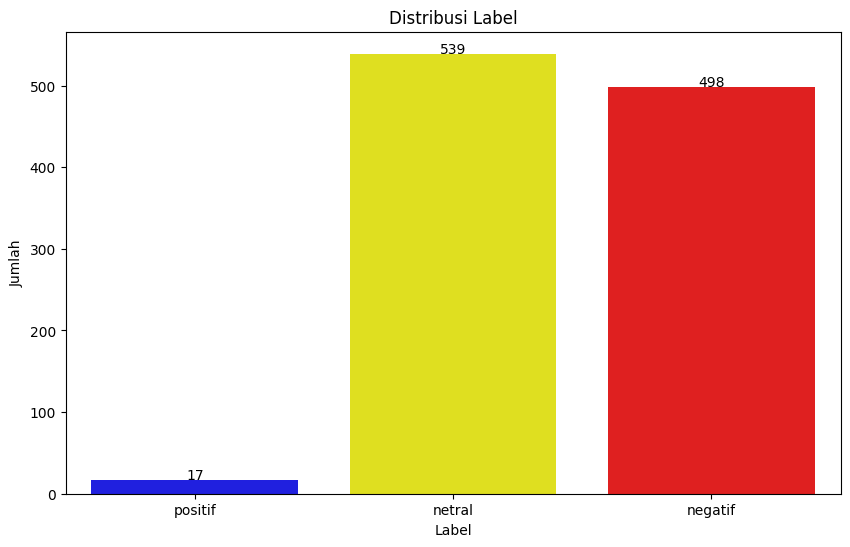

In [ ]:
# Menghitung jumlah kemunculan setiap label
label_counts = df['label'].value_counts()

# Mengurutkan label sesuai keinginan
ordered_labels = ['positif', 'netral', 'negatif']
label_counts = label_counts.reindex(ordered_labels)

# Warna untuk setiap label
colors = ['blue', 'yellow', 'red']

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)
plt.title('Distribusi Label')
plt.xlabel('Label')
plt.ylabel('Jumlah')

# Menampilkan angka di atas setiap batang
for i, v in enumerate(label_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center')

plt.show()

In [ ]:
at2 = df['date']
at3 = df['likes']

df2 = pd.concat([at2, at3, df1], axis=1)
df2

,date,likes,text,label
0,Mon Sep 30 12:24:19 +0000 2024,0,ngerasa krl makin padet praduga salah kata ban...,netral
1,Mon Sep 30 11:31:00 +0000 2024,2,wacana terap subsidi tarif krl dasar nomor ind...,netral
2,Sun Sep 29 15:26:36 +0000 2024,0,subsidi krl sempit dasar nik warga kian jepit,negatif
3,Sun Sep 29 12:50:51 +0000 2024,0,yakin analis trubus subsidi krl menteri bumn m...,netral
4,Sun Sep 29 12:33:14 +0000 2024,25,menteri bumn mau ubah badan amat sebut pso anc...,netral
...,...,...,...,...
1049,Wed Aug 28 10:36:47 +0000 2024,16,apbn darah darah ketemu cara benar cabut bagi ...,positif
1050,Wed Aug 28 10:30:22 +0000 2024,2,bbm gas krl busway segala subsidi model bas ni...,negatif
1051,Wed Aug 28 10:21:44 +0000 2024,0,perintah ubah skema subsidi krl jabodetabek ba...,netral
1052,Wed Aug 28 10:16:00 +0000 2024,2656,perintah ubah skema subsidi krl jabodetabek ba...,netral


In [ ]:
# Simpan dataframe yang telah melalui proses preprocessing sebagai file csv dengan nama "subsidiKRL_prp.csv"
file = "subsidiKRL_prp.csv"
df2.to_csv(file, index = False)

In [ ]:
from google.colab import files

files.download("subsidiKRL_prp.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>